# Here sunset sequence

In [1]:
# imports
import struct
from PIL import Image
import numpy as np
import scipy
import scipy.misc
import scipy.cluster
import codecs
import time
import math
import flux_led_v3 as flux_led
import os

In [2]:
# processing image
NUM_CLUSTERS = 5

print('reading image')
im = Image.open('/Users/sasha/Dropbox/Screenshots/asdfasdfadf.png')
im = im.resize((150, 150))      # optional, to reduce time
ar = np.asarray(im)
shape = ar.shape
ar = ar.reshape(scipy.product(shape[:2]), shape[2]).astype(float)

print('finding clusters')
codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)

for code in codes:
    colour = ''.join(chr(int(c)) for c in code)
    colour_hex = codecs.encode(colour.encode(), 'hex')
    print('#%s' % (str(colour_hex.decode())[:6]))
    print(int(code[0]), int(code[1]), int(code[2]))

reading image
finding clusters
#c29dc2
157 144 169
#c2b0c2
176 138 147
#c2a261
162 97 106
#72516d
114 81 109
#c2ba7c
186 124 120


In [3]:
# setting colors
filepath = 'ip.order.txt'
bulbs = {}

with open(filepath) as fp:
    line = fp.readline()
    cnt = 1
    while line:
        line = fp.readline()
        if line.strip() == "":
            continue
        ip = line.strip()
        print ("Handle IP [{}]:".format(ip))

        try:

            bulb = flux_led.WifiLedBulb(ip)
            bulb.setRgb(90,28,34)
            time.sleep(0.1)

        except Exception as e:
            print ("Unable to connect to bulb at [{}]: {}".format(ip,e))
            continue
    

Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:


In [4]:
## Creates a gamma-corrected lookup table
# got the code from https://gist.github.com/hexagon5un/3df734ad08d8dc8d9ace0491ef97cc58 
# background reading https://en.wikipedia.org/wiki/Lookup_table
# https://en.wikipedia.org/wiki/Gamma_correction

def gamma(nsteps, gamma):
    gammaedUp = [math.pow(x, gamma) for x in range(nsteps)]
    return [x/max(gammaedUp) for x in gammaedUp]

def rounder(topValue, gammas):
    return [min(topValue, round(x*topValue)) for x in gammas]

myGamma = 2.3
steps = 255

#print("{}-step brightness table: gamma = {}\n".format(steps, myGamma))

#for value in rounder(255, gamma(steps, myGamma)):
#    print("{}".format(value))


This is what the output looks like:
![Screenshot 2018-07-26 22.44.37](Screenshot 2018-07-26 22.44.37.png)

In [5]:
def gamma_correction(input_color):
    return rounder(254, gamma(steps, myGamma))[input_color]

In [6]:
gamma_correction(106)

34

---
## Prototype loop

In [7]:
directory = "/Users/sasha/Dropbox/code/18_06_bm_art/sunset/screenshots/"

In [8]:
def process_image(image):
    # processing image
    NUM_CLUSTERS = 5

    print('reading image')
    im = Image.open(image)
    im = im.resize((150, 150))      # optional, to reduce time
    ar = np.asarray(im)
    shape = ar.shape
    ar = ar.reshape(scipy.product(shape[:2]), shape[2]).astype(float)

    print('finding clusters')
    codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)

    gamma_corrected = []

    for code in codes:
        colour = ''.join(chr(int(c)) for c in code)
        colour_hex = codecs.encode(colour.encode(), 'hex')
        print('#%s' % (str(colour_hex.decode())[:6]))
        print(int(code[0]), int(code[1]), int(code[2]))
        gamma_corrected.append([gamma_correction(int(code[0])), gamma_correction(int(code[1])), gamma_correction(int(code[2]))])
    
    print(gamma_corrected)
    return gamma_corrected

In [13]:
def set_colors(colors):
    # setting colors
    filepath = 'ip.order.txt'
    bulbs = {}

    with open(filepath) as fp:
        line = fp.readline()
        cnt = 1
        while line:
            line = fp.readline()
            if line.strip() == "":
                continue
            ip = line.strip()
            print ("Handle IP [{}]:".format(ip))

            try:

                bulb = flux_led.WifiLedBulb(ip)
                bulb.setRgb(colors[0][0],colors[0][1],colors[0][2])
                time.sleep(0.1)

            except Exception as e:
                print ("Unable to connect to bulb at [{}]: {}".format(ip,e))
                continue
        

In [10]:
colors_magic =  []

for filename in os.listdir(directory):
    if filename.endswith(".jpg"): 
        colors = process_image(directory+filename)
        colors_magic.append(colors)
        continue
    else:
        continue

reading image
finding clusters
#c3a5c2
229 159 139
#c3b5c2
245 140 99
#c38c79
204 121 116
#c380c2
192 142 145
#c28860
136 96 122
[[200, 86, 63], [234, 65, 29], [153, 46, 42], [133, 67, 70], [60, 27, 47]]
reading image
finding clusters
#c38172
193 114 116
#c3adc2
237 137 106
#c385c2
197 142 141
#c28160
129 96 124
#c3aac2
234 170 150
[[135, 40, 42], [217, 61, 34], [142, 67, 66], [53, 27, 49], [210, 101, 76]]
reading image
finding clusters
#c3a9c2
233 163 138
#c3b0c2
240 134 97
#7f5d76
127 93 118
#c3826f
194 111 110
#c385c2
197 138 135
[[208, 92, 62], [223, 58, 28], [52, 25, 44], [137, 38, 37], [142, 62, 59]]
reading image
finding clusters
#150b28
21 11 40
#4b3a47
75 58 71
#5c5d78
92 93 120
#575063
87 80 99
#312134
49 33 52
[[1, 0, 4], [15, 9, 14], [25, 25, 45], [22, 18, 29], [6, 2, 7]]
reading image
finding clusters
#604b5a
96 75 90
#6f70c2
111 112 142
#422e42
66 46 66
#1f1634
31 22 52
#6c6278
108 98 120
[[27, 15, 23], [38, 39, 67], [11, 5, 11], [2, 1, 7], [36, 28, 45]]
reading image
fin

#c389c2
201 144 143
#c38675
198 117 119
#c28763
135 99 127
#c3aec2
238 140 109
#c3abc2
235 171 152
[[148, 69, 68], [143, 43, 44], [59, 29, 52], [219, 65, 36], [212, 102, 78]]
reading image
finding clusters
#c3a9c2
233 168 148
#c3aec2
238 136 105
#c2815f
129 95 124
#c385c2
197 141 141
#c38172
193 114 116
[[208, 98, 73], [219, 60, 33], [53, 26, 49], [142, 66, 66], [135, 40, 42]]
reading image
finding clusters
#201736
32 23 54
#614c5a
97 76 90
#7071c2
112 113 143
#6d6378
109 99 120
#422e42
66 46 66
[[2, 1, 7], [28, 16, 23], [39, 39, 68], [36, 29, 45], [11, 5, 11]]
reading image
finding clusters
#5a5266
90 82 102
#312134
49 33 52
#60617c
96 97 124
#160c2a
22 12 42
#4d3c49
77 60 73
[[23, 19, 31], [6, 2, 7], [27, 28, 49], [1, 0, 4], [16, 9, 14]]
reading image
finding clusters
#c29c75
156 117 117
#4f3e5e
79 62 94
#c2967d
150 125 139
#754a5e
117 74 94
#c2925e
146 94 98
[[83, 43, 43], [17, 10, 26], [76, 50, 63], [43, 15, 26], [71, 26, 28]]
reading image
finding clusters
#5b405f
91 64 95
#c28dc2

#180f2e
24 15 46
#625a6e
98 90 110
#6668c2
102 104 133
#372539
55 37 57
#55424f
85 66 79
[[1, 0, 5], [28, 23, 37], [31, 33, 57], [8, 3, 8], [20, 11, 17]]
reading image
finding clusters
#c2a16d
161 109 113
#c28455
132 85 106
#5c486a
92 72 106
#c2a4c2
164 139 153
#c2adc2
173 132 130
[[89, 36, 39], [56, 20, 34], [25, 14, 34], [93, 63, 79], [105, 56, 54]]
reading image
finding clusters
#3c2f54
60 47 84
#c288c2
136 133 161
#c28a7b
138 123 144
#c28e6a
142 106 116
#694961
105 73 97
[[9, 5, 20], [60, 57, 89], [62, 48, 69], [67, 34, 42], [33, 14, 28]]
reading image
finding clusters
#c283c2
131 128 157
#c28565
133 101 113
#63455b
99 69 91
#c28476
132 118 139
#362a4c
54 42 76
[[55, 53, 84], [57, 30, 39], [29, 13, 24], [56, 44, 63], [7, 4, 16]]
reading image
finding clusters
#c28159
129 89 113
#5e4d71
94 77 113
#c29e6e
158 110 116
#c29fc2
159 137 156
#c2a9c2
169 132 137
[[53, 23, 39], [26, 16, 39], [85, 37, 42], [86, 61, 83], [100, 56, 61]]
reading image
finding clusters
#c29f79
159 121 123
#c2805

#322d57
50 45 87
#c28bc2
139 130 156
#c29471
148 113 124
#765369
118 83 105
#543c5b
84 60 91
[[6, 5, 22], [63, 54, 83], [73, 39, 49], [44, 19, 33], [20, 9, 24]]
reading image
finding clusters
#c2acc2
172 131 130
#c2a06c
160 108 113
#c28154
129 84 105
#c2a4c2
164 138 153
#594769
89 71 105
[[104, 55, 54], [88, 36, 39], [53, 20, 33], [93, 62, 79], [23, 14, 33]]
reading image
finding clusters
#70667b
112 102 123
#473145
71 49 69
#7374c2
115 116 145
#654f5e
101 79 94
#221a38
34 26 56
[[39, 31, 48], [14, 6, 13], [41, 42, 70], [30, 17, 26], [2, 1, 8]]
reading image
finding clusters
#c2b1c2
177 139 148
#6a4c6e
106 76 110
#c2ba69
186 105 102
#c2bc7f
188 127 121
#c29257
146 87 105
[[111, 63, 73], [34, 16, 37], [124, 33, 31], [127, 52, 46], [71, 22, 33]]
reading image
finding clusters
#c2b860
184 96 100
#c2afc2
175 142 152
#c2894e
137 78 103
#594469
89 68 105
#c2ba7f
186 127 123
[[121, 27, 30], [108, 67, 78], [61, 17, 32], [23, 12, 33], [124, 52, 48]]
reading image
finding clusters
#c29c68
156 10

#c29365
147 101 105
#c2a07b
160 123 125
#c2947f
148 127 145
#4f3f61
79 63 97
#754d62
117 77 98
[[72, 30, 33], [88, 48, 50], [73, 52, 70], [17, 10, 28], [43, 16, 28]]
reading image
finding clusters
#785467
120 84 103
#c29171
145 113 122
#573c5a
87 60 90
#c2847c
132 124 150
#342c56
52 44 86
[[45, 20, 32], [70, 39, 47], [22, 9, 23], [56, 49, 76], [7, 5, 21]]
reading image
finding clusters
#c28c64
140 100 117
#c2a07e
160 126 135
#6a4c6a
106 76 106
#c290c2
144 133 159
#463c68
70 60 104
[[65, 30, 43], [88, 51, 59], [34, 16, 34], [69, 57, 86], [13, 9, 33]]
reading image
finding clusters
#c2a47e
164 126 130
#7b5168
123 81 104
#c29868
152 104 109
#544467
84 68 103
#c299c2
153 131 149
[[93, 51, 54], [48, 18, 33], [78, 33, 36], [20, 12, 32], [79, 55, 74]]
reading image
finding clusters
#000000
0 0 0
[[0, 0, 0]]
reading image
finding clusters
#000000
0 0 0
[[0, 0, 0]]
reading image
finding clusters
#c2a25d
162 93 111
#c2aac2
170 139 152
#c28055
128 85 115
#584a70
88 74 112
#c2a778
167 120 128
[[90

#c2b1c2
177 146 158
#c2895c
137 92 122
#c2a76a
167 106 121
#c2adc2
173 130 137
#615278
97 82 120
[[111, 71, 85], [61, 25, 47], [97, 34, 46], [105, 54, 61], [28, 19, 45]]
reading image
finding clusters
#c3aac2
234 187 161
#c39dc3
221 201 227
#c39dc3
221 201 194
#c3abc2
235 163 131
#c39fc2
223 137 103
[[210, 126, 89], [184, 148, 196], [184, 148, 137], [212, 92, 55], [188, 61, 32]]
reading image
finding clusters
#c3957e
213 126 97
#c3abc2
235 186 154
#c3b7c2
247 159 103
#c39bc2
219 153 127
#c39dc3
221 201 204
[[169, 51, 28], [212, 124, 80], [238, 86, 32], [181, 79, 52], [184, 148, 153]]
reading image
finding clusters
#c39cc3
220 202 219
#c3a6c2
230 167 137
#c395c2
213 130 101
#c3b4c2
244 155 104
#c3a2c3
226 197 177
[[183, 150, 181], [202, 97, 61], [169, 54, 30], [232, 82, 33], [194, 142, 111]]
reading image
finding clusters
#c39ac2
218 132 100
#c3aac2
234 185 155
#c3a9c2
233 161 124
#c39dc3
221 201 189
#c39dc3
221 201 224
[[179, 56, 30], [210, 123, 82], [208, 89, 49], [184, 148, 129], [18

#c3a7c2
231 191 170
#c3acc2
236 168 142
#c39cc3
220 202 201
#c39dc3
221 201 231
#c3a7c2
231 147 110
[[204, 132, 101], [214, 98, 67], [183, 150, 148], [184, 148, 204], [204, 72, 37]]
reading image
finding clusters
#c3b3c2
243 155 106
#c39dc3
221 201 222
#c3a7c2
231 169 139
#c396c2
214 131 103
#c3a0c3
224 198 179
[[229, 82, 34], [184, 148, 186], [204, 100, 63], [171, 55, 32], [190, 143, 114]]
reading image
finding clusters
#c399c2
217 151 125
#c3acc2
236 183 151
#c39dc3
221 201 201
#c3b8c2
248 158 100
#c3957c
213 124 95
[[177, 77, 50], [214, 119, 77], [184, 148, 148], [240, 85, 30], [169, 49, 26]]
reading image
finding clusters
#000000
0 0 0
[[0, 0, 0]]
reading image
finding clusters
#c2b3c2
179 147 160
#64557c
100 85 124
#c2aec2
174 130 139
#c2ac69
172 105 122
#c28b60
139 96 126
[[114, 72, 88], [30, 20, 49], [106, 54, 63], [104, 33, 47], [63, 27, 51]]
reading image
finding clusters
#000000
0 0 0
[[0, 0, 0]]
reading image
finding clusters
#000000
0 0 0
[[0, 0, 0]]
reading image
finding c

#c2a9c2
169 129 130
#734d62
115 77 98
#c29868
152 104 108
#c298c2
152 133 152
#4c3c60
76 60 96
[[100, 53, 54], [41, 16, 28], [78, 33, 36], [78, 57, 78], [16, 9, 27]]
reading image
finding clusters
#c29c6d
156 109 113
#c2a6c2
166 131 137
#c299c2
153 133 152
#59486c
89 72 108
#7f556c
127 85 108
[[83, 36, 39], [95, 55, 61], [79, 57, 78], [23, 14, 36], [52, 20, 36]]
reading image
finding clusters
#c28962
137 98 115
#6a4a66
106 74 102
#c28dc2
141 131 156
#443a62
68 58 98
#c29d7b
157 123 131
[[61, 28, 41], [34, 15, 31], [66, 55, 83], [12, 9, 28], [84, 48, 55]]
reading image
finding clusters
#7f596c
127 89 108
#3a325b
58 50 91
#c2887f
136 127 152
#5e415e
94 65 94
#c29774
151 116 126
[[52, 23, 36], [9, 6, 24], [60, 52, 78], [26, 11, 26], [77, 42, 51]]
reading image
finding clusters
#4b3b5c
75 59 92
#70495e
112 73 94
#c29062
144 98 102
#c2907d
144 125 142
#c29d78
157 120 121
[[15, 9, 25], [39, 14, 26], [69, 28, 31], [69, 50, 67], [84, 45, 46]]
reading image
finding clusters
#79566d
121 86 109
#

#c38bc2
203 144 137
#c2a465
164 101 114
#645276
100 82 118
#c2a5c2
165 132 143
#c39d79
221 121 102
[[152, 69, 61], [93, 30, 40], [30, 19, 44], [94, 56, 68], [184, 46, 31]]
reading image
finding clusters
#c294c2
148 137 163
#c2abc2
171 134 140
#c2996d
153 109 118
#4a3e66
74 62 102
#73516b
115 81 107
[[73, 61, 92], [102, 58, 65], [79, 36, 44], [15, 10, 31], [41, 18, 35]]
reading image
finding clusters
#5e4363
94 67 99
#c28cc2
140 129 154
#c2805b
128 91 110
#c29a77
154 119 128
#3a335e
58 51 94
[[26, 12, 29], [65, 53, 80], [53, 24, 37], [80, 44, 53], [9, 6, 26]]
reading image
finding clusters
#c29b6a
155 106 110
#c2abc2
171 131 132
#c29ac2
154 135 154
#4d3e61
77 62 97
#754f65
117 79 101
[[82, 34, 37], [102, 55, 56], [80, 59, 80], [16, 10, 28], [43, 17, 30]]
reading image
finding clusters
#493e65
73 62 101
#c293c2
147 136 161
#714f69
113 79 105
#c2976b
151 107 117
#c2a9c2
169 133 139
[[14, 10, 30], [72, 60, 89], [39, 17, 33], [77, 35, 43], [100, 57, 63]]
reading image
finding clusters
#c298

#c3957f
213 127 98
#c3aac2
234 186 156
#c3b7c2
247 160 106
#c39cc3
220 201 206
#c39ac2
218 154 129
[[169, 52, 28], [210, 124, 83], [238, 88, 34], [183, 148, 157], [179, 80, 53]]
reading image
finding clusters
#c3aac2
234 186 156
#c396c2
214 128 98
#c3b7c2
247 160 107
#c39bc2
219 155 128
#c39cc3
220 201 206
[[210, 124, 83], [171, 53, 28], [238, 88, 35], [181, 82, 53], [183, 148, 157]]
reading image
finding clusters
#c39dc3
221 201 229
#c3aac2
234 187 164
#c39dc3
221 201 196
#c3a3c2
227 141 106
#c3acc2
236 165 135
[[184, 148, 200], [210, 126, 93], [184, 148, 140], [196, 66, 34], [214, 94, 59]]
reading image
finding clusters
#000000
0 0 0
[[0, 0, 0]]
reading image
finding clusters
#c2afc2
175 131 141
#c2bf71
191 113 122
#67577e
103 87 126
#c2b4c2
180 147 161
#c29862
152 98 127
[[108, 55, 66], [132, 39, 47], [32, 22, 51], [115, 72, 89], [78, 28, 52]]
reading image
finding clusters
#000000
0 0 0
[[0, 0, 0]]
reading image
finding clusters
#000000
0 0 0
[[0, 0, 0]]
reading image
finding clust

#c2aec2
174 144 160
#c38973
201 115 115
#c2a8c2
168 129 140
#65567d
101 86 125
#c29663
150 99 124
[[106, 69, 88], [148, 41, 41], [98, 53, 65], [30, 21, 50], [76, 29, 49]]
reading image
finding clusters
#c3acc2
236 131 100
#c3a4c2
228 160 140
#c2bb6e
187 110 113
#7b5b78
123 91 120
#c2bdc2
189 138 139
[[214, 55, 30], [198, 88, 65], [126, 37, 39], [48, 24, 45], [129, 62, 63]]
reading image
finding clusters
#c38bc2
203 143 138
#c3afc2
239 169 141
#c38975
201 117 113
#c3b4c2
244 138 100
#c28b61
139 97 120
[[152, 68, 62], [221, 100, 66], [148, 43, 39], [232, 62, 30], [63, 28, 45]]
reading image
finding clusters
#c3b1c2
241 138 105
#c38676
198 118 116
#c28c63
140 99 122
#c3b2c2
242 174 143
#c38dc2
205 146 138
[[225, 62, 33], [143, 44, 42], [65, 29, 47], [227, 106, 68], [155, 71, 62]]
reading image
finding clusters
#c2877f
135 127 153
#715166
113 81 102
#c28e6d
142 109 120
#523956
82 57 86
#312b51
49 43 81
[[59, 52, 79], [39, 18, 31], [67, 36, 45], [19, 8, 21], [6, 4, 18]]
reading image
findin

#c28558
133 88 114
#c2b7c2
183 129 129
#644c6f
100 76 111
#c380c2
192 144 147
#c2a26d
162 109 115
[[57, 22, 40], [119, 53, 53], [30, 16, 38], [133, 69, 72], [90, 36, 41]]
reading image
finding clusters
#0a050b
10 5 11
#16151a
22 21 26
#181924
24 25 36
#110d12
17 13 18
#020009
2 0 9
[[0, 0, 0], [1, 1, 1], [1, 1, 3], [1, 0, 1], [0, 0, 0]]
reading image
finding clusters
#c2ad6e
173 110 111
#61496a
97 73 106
#c38fc2
207 130 126
#c2bec2
190 144 148
#c28254
130 84 107
[[105, 37, 38], [28, 14, 34], [159, 54, 51], [130, 69, 73], [54, 20, 35]]
reading image
finding clusters
#c28053
128 83 107
#5f4769
95 71 105
#c2b7c2
183 141 145
#c384c2
196 130 126
#c2a56d
165 109 111
[[53, 19, 35], [26, 14, 33], [119, 66, 70], [140, 54, 51], [94, 36, 38]]
reading image
finding clusters
#43445a
67 68 90
#0c051b
12 5 27
#332832
51 40 50
#3f3a48
63 58 72
#201323
32 19 35
[[12, 12, 23], [0, 0, 1], [6, 4, 6], [10, 9, 14], [2, 1, 3]]
reading image
finding clusters
#c3b2c2
242 170 136
#c2885d
136 93 113
#c2bd6e
189 

#c386c2
198 135 123
#c2b969
185 105 101
#c28a5a
138 90 103
#c3b4c2
244 169 130
#c3afc2
239 135 91
[[143, 59, 48], [123, 33, 30], [62, 23, 32], [232, 100, 54], [221, 59, 24]]
reading image
finding clusters
#c2aec2
174 130 134
#c2a06d
160 109 118
#c28559
133 89 117
#c2bcc2
188 145 150
#624e72
98 78 114
[[106, 54, 58], [88, 36, 44], [57, 23, 43], [127, 70, 76], [28, 17, 40]]
reading image
finding clusters
#312d3a
49 45 58
#353648
53 54 72
#281f28
40 31 40
#180d1b
24 13 27
#080215
8 2 21
[[6, 5, 9], [7, 7, 14], [4, 2, 4], [1, 0, 1], [0, 0, 1]]
reading image
finding clusters
#c2bfc2
191 143 146
#c2a26d
162 109 114
#c28457
132 87 111
#c2b9c2
185 129 127
#634b6e
99 75 110
[[132, 68, 71], [90, 36, 40], [56, 22, 38], [123, 53, 52], [29, 15, 37]]
reading image
finding clusters
#c2ab6b
171 107 107
#c2bbc2
187 140 146
#5f4667
95 70 103
#c28151
129 81 102
#c38f7d
207 125 119
[[102, 35, 35], [126, 65, 71], [26, 13, 32], [53, 18, 31], [159, 50, 44]]
reading image
finding clusters
#1a141b
26 20 27
#21

#2b2140
43 33 64
#523a4f
82 58 79
#7c7ac2
124 122 152
#715866
113 88 102
#796dc2
121 109 131
[[4, 2, 11], [19, 9, 17], [49, 47, 78], [39, 22, 31], [46, 36, 55]]
reading image
finding clusters
#c387c2
199 143 142
#c3aac2
234 170 150
#c28562
133 98 127
#c38474
196 116 117
#c3afc2
239 138 107
[[145, 68, 67], [210, 101, 76], [57, 28, 52], [140, 42, 43], [221, 62, 35]]
reading image
finding clusters
#c3aac2
234 135 101
#c3b1c2
241 169 136
#c382c2
194 138 131
#c2bc6e
188 110 107
#c2865c
134 92 112
[[210, 59, 30], [225, 100, 60], [137, 62, 55], [127, 37, 35], [58, 25, 39]]
reading image
finding clusters
#c3aec2
238 165 136
#c388c2
200 140 136
#c2865e
134 94 118
#c38472
196 114 111
#c3b1c2
241 133 98
[[219, 94, 60], [147, 65, 60], [58, 26, 44], [140, 40, 38], [225, 57, 28]]


In [46]:
colors_magic

[[[153, 45, 41], [234, 65, 30], [198, 85, 63], [135, 66, 69], [59, 27, 47]],
 [[135, 40, 42], [210, 100, 73], [53, 27, 49], [214, 60, 34], [142, 67, 66]],
 [[143, 42, 39], [232, 59, 26], [132, 63, 65], [53, 25, 44], [198, 84, 59]],
 [[22, 18, 29], [25, 26, 46], [6, 2, 7], [1, 0, 4], [15, 9, 14]],
 [[2, 1, 7], [35, 28, 44], [38, 39, 66], [10, 5, 11], [26, 15, 22]],
 [[41, 23, 33], [47, 38, 56], [4, 2, 11], [19, 9, 17], [49, 48, 78]],
 [[28, 12, 23], [7, 4, 14], [54, 42, 62], [53, 52, 83], [55, 29, 38]],
 [[38, 14, 26], [97, 48, 46], [72, 28, 30], [14, 9, 24], [80, 55, 69]],
 [[101, 53, 51], [44, 17, 30], [18, 11, 29], [80, 32, 35], [88, 59, 76]],
 [[51, 23, 37], [66, 57, 86], [8, 6, 24], [25, 11, 27], [79, 44, 55]],
 [[66, 19, 32], [30, 14, 34], [121, 49, 44], [123, 30, 29], [106, 61, 71]],
 [[32, 15, 38], [133, 56, 52], [115, 71, 83], [79, 21, 35], [143, 33, 33]],
 [[1, 0, 1], [3, 1, 3], [0, 0, 1], [5, 6, 11], [4, 4, 6]],
 [[0, 0, 0], [0, 0, 0], [0, 0, 1], [0, 0, 0], [0, 0, 0]],
 [[126

In [58]:
[print(color[0][0]) for color in colors_magic]

153
135
143
22
2
41
28
38
101
51
66
32
1
0
126
53
0
50
115
127
240
175
223
175
44
69
223
129
0
0
124
3
133
119
83
20
54
82
43
11
22
188
137
132
212
135
2
1
76
24
22
78
53
111
68
117
0
127
115
0
140
51
177
184
173
184
52
142
100
0
0
127
132
118
132
42
53
24
21
26
1
39
133
210
55
127
26
1
105
9
30
100
86
117
33
83
0
0
55
132
232
43
147
175
184
169
44
150
57
0
26
53
0
124
114
84
30
52
89
70
30
2
214
135
137
196
65
8
10
85
58
6
88
14
33
124
53
0
0
52
0
108
143
214
225
229
192
184
184
221
93
1
0
135
115
0
73
112
30
63
104
85
30
2
8
152
148
214
135
61
212
210
63
90
74
88
70
14
93
0
0
52
112
0
0
109
183
240
184
208
0
26
28
0
31
0
0
58
20
71
21
50
44
14
181
42
80
73
94
135
94
177
121
45
85
65
90
37
72
85
0
0
0
108
0
0
27
212
169
202
184
169
190
0
105
26
0
0
0
0
58
72
92
71
11
65
78
44
51
164
72
30
93
142
56
115
93
97
33
60
22
37
27
71
0
0
0
106
30
0
0
186
184
184
204
190
171
0
114
0
0
28
0
0
71
36
26
67
22
35
49
94
112
208
117
23
26
23
109
204
78
94
59
68
22
66
77
0
0
0
66
61
0
108
169
173
240

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [11]:
sorted_colors = sorted(colors_magic, key=lambda color: color[0][2], reverse=True)

In [15]:
for colors in sorted_colors:
    set_colors(colors)
    #time.sleep(5)

Handle IP [172.20.10.5]:


KeyboardInterrupt: 

So the first loop that I tried looked really unatural. It kept flickering and wasn't very consistent, so I decided to test by sorting the colors by the brightness of blue. That looked cool, but what if I tried to sort them by red -> not much better.

What if I sorted all of them by total value of the colors?

In [82]:
i = 0
[sum(sorted_colors[0][0])]

[536]

In [17]:
sorted_colors_sum = sorted(colors_magic, key=lambda color: sum(color[0]), reverse=True)

In [18]:
for colors in sorted_colors_sum:
    set_colors(colors)
    #time.sleep(5)

Handle IP [172.20.10.5]:
Unable to connect to bulb at [172.20.10.5]: [Errno 60] Operation timed out
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:


Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:


Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:


Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:
Handle IP [172.20.10.5]:
Handle IP [172.20.10.4]:


Oh my god that looks so much better. What if I tried with a different gamma?

In [19]:
myGamma = 5

colors_magic_gamma =  []

for filename in os.listdir(directory):
    if filename.endswith(".jpg"): 
        colors = process_image(directory+filename)
        colors_magic_gamma.append(colors)
        continue
    else:
        continue

reading image
finding clusters
#c3a2c2
226 156 137
#c2bfc2
191 141 144
#c3b6c2
246 141 100
#c38b76
203 118 114
#c28760
135 96 122
[[142, 22, 12], [61, 13, 15], [216, 13, 2], [83, 5, 5], [11, 2, 6]]
reading image
finding clusters
#c385c2
197 142 141
#c28260
130 96 124
#c38172
193 114 116
#c3adc2
237 137 105
#c3aac2
234 168 148
[[71, 14, 13], [9, 2, 7], [64, 5, 5], [180, 12, 3], [169, 32, 17]]
reading image
finding clusters
#c2bbc2
187 139 142
#c39fc2
223 152 134
#c2805d
128 93 118
#c3b4c2
244 137 96
#c38573
197 115 111
[[55, 12, 14], [132, 19, 10], [8, 2, 5], [208, 12, 2], [71, 5, 4]]
reading image
finding clusters
#2e1e31
46 30 49
#5c5d78
92 93 120
#574f62
87 79 98
#493945
73 57 69
#140a28
20 10 40
[[0, 0, 0], [2, 2, 6], [1, 1, 2], [0, 0, 0], [0, 0, 0]]
reading image
finding clusters
#1e1634
30 22 52
#402c41
64 44 65
#5f4a59
95 74 89
#6c6277
108 98 119
#6f70c2
111 112 142
[[0, 0, 0], [0, 0, 0], [2, 1, 1], [4, 2, 6], [4, 4, 14]]
reading image
finding clusters
#735a68
115 90 104
#2c2241


#c38172
193 114 116
#c385c2
197 141 140
#c2815f
129 95 124
#c3a8c2
232 168 148
#c3afc2
239 137 105
[[64, 5, 5], [71, 13, 13], [9, 2, 7], [161, 32, 17], [187, 12, 3]]
reading image
finding clusters
#7071c2
112 113 143
#604b5a
96 75 90
#422d41
66 45 65
#1f1636
31 22 54
#6d6378
109 99 120
[[4, 4, 14], [2, 1, 1], [0, 0, 0], [0, 0, 0], [4, 2, 6]]
reading image
finding clusters
#312034
49 32 52
#150c2a
21 12 42
#60617c
96 97 124
#5a5266
90 82 102
#4d3c48
77 60 72
[[0, 0, 0], [0, 0, 0], [2, 2, 7], [1, 1, 3], [1, 0, 0]]
reading image
finding clusters
#c29c75
156 117 117
#c2935e
147 94 99
#754a5e
117 74 94
#c2967d
150 125 139
#4f3e5e
79 62 94
[[22, 5, 5], [16, 2, 2], [5, 1, 2], [18, 7, 12], [1, 0, 2]]
reading image
finding clusters
#7b586c
123 88 108
#c28dc2
141 132 157
#5a3f5f
90 63 95
#c29774
151 116 126
#363159
54 49 89
[[7, 1, 4], [13, 10, 23], [1, 0, 2], [19, 5, 8], [0, 0, 1]]
reading image
finding clusters
#c2a2c2
162 137 151
#7e5267
126 82 103
#574567
87 69 103
#c29d6b
157 107 110
#c2abc

#c29d6d
157 109 115
#c29fc2
159 137 155
#c28158
129 88 113
#c2a9c2
169 132 136
#5d4d71
93 77 113
[[23, 4, 5], [24, 12, 21], [9, 1, 4], [33, 10, 11], [2, 1, 4]]
reading image
finding clusters
#564568
86 69 104
#c29f63
159 99 102
#c29f79
159 121 124
#c29dc2
157 131 144
#c28051
128 81 102
[[1, 0, 3], [24, 2, 3], [24, 6, 7], [23, 9, 15], [8, 1, 3]]
reading image
finding clusters
#c28a4d
138 77 101
#c2b87e
184 126 122
#c2adc2
173 140 152
#594368
89 67 104
#c2b55f
181 95 99
[[12, 1, 3], [51, 8, 6], [37, 13, 19], [1, 0, 3], [47, 2, 2]]
reading image
finding clusters
#c2b464
180 100 102
#c2bd7d
189 125 118
#c2b0c2
176 138 147
#674a6d
103 74 109
#c28d54
141 84 105
[[45, 2, 3], [58, 7, 5], [41, 12, 16], [3, 1, 4], [13, 1, 3]]
reading image
finding clusters
#7f546e
127 84 110
#c2bdc2
189 141 144
#5e486c
94 72 108
#c29c68
156 104 112
#c2ae7e
174 126 128
[[8, 1, 4], [58, 13, 15], [2, 0, 4], [22, 3, 4], [38, 8, 8]]
reading image
finding clusters
#000000
0 0 0
[[0, 0, 0]]
reading image
finding cluste

#c29c68
156 104 116
#c2b4c2
180 142 152
#5e4c70
94 76 112
#c28156
129 86 115
#c2aa7f
170 127 131
[[22, 3, 5], [45, 14, 19], [2, 1, 4], [9, 1, 5], [34, 8, 9]]
reading image
finding clusters
#07080c
7 8 12
#060507
6 5 7
#070709
7 7 9
#030204
3 2 4
#000002
0 0 2
[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]
reading image
finding clusters
#000000
0 0 0
[[0, 0, 0]]
reading image
finding clusters
#c2bdc2
189 141 143
#c2ae7d
174 125 126
#7e546d
126 84 109
#5e486a
94 72 106
#c29b68
155 104 111
[[58, 13, 14], [38, 7, 8], [8, 1, 4], [2, 0, 3], [21, 3, 4]]
reading image
finding clusters
#100d11
16 13 17
#161721
22 23 33
#151319
21 19 25
#0a050b
10 5 11
#020007
2 0 7
[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]
reading image
finding clusters
#c3acc2
236 131 84
#c2bf7f
191 127 112
#c3b1c2
241 164 121
#7f525d
127 82 93
#c2af60
175 96 91
[[176, 9, 1], [61, 8, 4], [195, 29, 6], [8, 1, 2], [39, 2, 1]]
reading image
finding clusters
#c387c2
199 139 132
#c3b3c2
243 171 137
#c3adc2
23

#c2abc2
171 129 134
#c2865a
134 90 119
#c2afc2
175 145 156
#5f5076
95 80 118
#c2a369
163 105 119
[[35, 9, 10], [10, 1, 6], [39, 15, 22], [2, 1, 5], [28, 3, 6]]
reading image
finding clusters
#c39cc3
220 202 215
#c394c2
212 129 101
#c3b5c2
245 155 102
#c3a6c2
230 166 134
#c3a3c3
227 195 172
[[124, 81, 110], [103, 9, 3], [212, 21, 3], [155, 30, 10], [145, 68, 36]]
reading image
finding clusters
#c39ac2
218 152 127
#c3967e
214 126 97
#c3abc2
235 185 153
#c3b8c2
248 160 104
#c39dc3
221 201 203
[[118, 19, 8], [108, 8, 2], [172, 52, 20], [225, 25, 3], [127, 79, 83]]
reading image
finding clusters
#c39dc3
221 201 200
#c399c2
217 152 125
#c3acc2
236 183 150
#c3947d
212 125 96
#c3b7c2
247 157 101
[[127, 79, 77], [116, 19, 7], [176, 49, 18], [103, 7, 2], [221, 23, 3]]
reading image
finding clusters
#c3b7c2
247 161 108
#c39dc2
221 156 130
#c396c2
214 128 99
#c3a9c2
233 188 159
#c39cc3
220 202 209
[[221, 26, 4], [127, 22, 9], [108, 8, 2], [165, 56, 24], [124, 81, 96]]
reading image
finding cluster

#c28458
132 88 117
#c2aec2
174 143 155
#c29f68
159 104 118
#5e4e73
94 78 115
#c2aa7f
170 127 132
[[10, 1, 5], [38, 14, 21], [24, 3, 5], [2, 1, 5], [34, 8, 10]]
reading image
finding clusters
#000000
0 0 0
[[0, 0, 0]]
reading image
finding clusters
#000000
0 0 0
[[0, 0, 0]]
reading image
finding clusters
#000000
0 0 0
[[0, 0, 0]]
reading image
finding clusters
#000000
0 0 0
[[0, 0, 0]]
reading image
finding clusters
#c29474
148 116 125
#3a3058
58 48 88
#5e415d
94 65 93
#7f5a6b
127 90 107
#c2867d
134 125 151
[[17, 5, 7], [0, 0, 1], [2, 0, 2], [8, 1, 3], [10, 7, 19]]
reading image
finding clusters
#714a60
113 74 96
#c29e7a
158 122 124
#c2927e
146 126 143
#c29163
145 99 103
#4c3c5e
76 60 94
[[4, 1, 2], [24, 6, 7], [16, 8, 14], [15, 2, 3], [1, 0, 2]]
reading image
finding clusters
#c2a37d
163 125 129
#c297c2
151 130 147
#524265
82 66 101
#c29767
151 103 107
#795066
121 80 102
[[28, 7, 9], [19, 9, 16], [1, 0, 3], [19, 3, 3], [6, 1, 3]]
reading image
finding clusters
#c28f67
143 103 119
#4a40

#7d5369
125 83 105
#c29969
153 105 109
#574668
87 70 104
#c2a57f
165 127 130
#c29ac2
154 132 149
[[7, 1, 3], [20, 3, 4], [1, 0, 3], [29, 8, 9], [21, 10, 18]]
reading image
finding clusters
#c28b63
139 99 108
#c29c7a
156 122 128
#c2887d
136 125 147
#694a60
105 74 96
#45385d
69 56 93
[[12, 2, 4], [22, 6, 8], [11, 7, 16], [3, 1, 2], [0, 0, 2]]
reading image
finding clusters
#c2a7c2
167 133 140
#7c5870
124 88 112
#c29b6f
155 111 118
#c298c2
152 135 156
#57486d
87 72 109
[[31, 10, 13], [7, 1, 4], [21, 4, 5], [19, 11, 22], [1, 0, 4]]
reading image
finding clusters
#c2a666
166 102 115
#c2a4c2
164 132 145
#c39f79
223 121 101
#665277
102 82 119
#c389c2
201 143 136
[[30, 3, 5], [29, 10, 15], [132, 6, 3], [3, 1, 6], [79, 14, 11]]
reading image
finding clusters
#c39ac2
218 153 142
#c3abc2
235 130 104
#c2b2c2
178 138 146
#71597b
113 89 123
#c2b66d
182 109 117
[[118, 20, 14], [172, 9, 3], [43, 12, 16], [4, 1, 7], [48, 4, 5]]
reading image
finding clusters
#c384c2
196 145 148
#c3a9c2
233 172 158
#c28

#c388c2
200 142 137
#c29f61
159 97 112
#c2a2c2
162 130 142
#c39975
217 117 101
#614f74
97 79 116
[[77, 14, 12], [24, 2, 4], [27, 9, 14], [116, 5, 3], [2, 1, 5]]
reading image
finding clusters
#c39d7a
221 122 103
#665378
102 83 120
#c2a667
166 103 116
#c2a8c2
168 133 144
#c38ec2
206 146 138
[[127, 6, 3], [3, 1, 6], [30, 3, 5], [32, 10, 15], [89, 16, 12]]
reading image
finding clusters
#c28c79
140 121 138
#6d4659
109 70 89
#c28d5f
141 95 98
#483757
72 55 87
#c29a75
154 117 117
[[13, 6, 12], [4, 0, 1], [13, 2, 2], [0, 0, 1], [21, 5, 5]]
reading image
finding clusters
#6f4a60
111 74 96
#47395c
71 57 92
#c2a77f
167 127 128
#c29565
149 101 105
#c295c2
149 131 150
[[4, 1, 2], [0, 0, 2], [31, 8, 8], [18, 3, 3], [18, 9, 18]]
reading image
finding clusters
#c2926a
146 106 121
#4e426d
78 66 109
#c2a4c2
164 130 139
#c293c2
147 135 161
#74536f
116 83 111
[[16, 3, 6], [1, 0, 4], [29, 9, 12], [16, 11, 26], [5, 1, 4]]
reading image
finding clusters
#c290c2
144 133 160
#6e4e66
110 78 102
#c2a6c2
166 13

#c39dc3
221 201 230
#c3acc2
236 167 140
#c3a5c2
229 145 109
#c3a7c2
231 191 170
#c39cc3
220 202 200
[[127, 79, 155], [176, 31, 13], [151, 15, 4], [158, 61, 34], [124, 81, 77]]
reading image
finding clusters
#c3987b
216 123 92
#c399c2
217 149 123
#c39dc3
221 201 201
#c3b8c2
248 159 100
#c3acc2
236 184 150
[[113, 7, 2], [116, 18, 7], [127, 79, 79], [225, 24, 2], [176, 51, 18]]
reading image
finding clusters
#000000
0 0 0
[[0, 0, 0]]
reading image
finding clusters
#c2b0c2
176 144 158
#c2b367
179 103 118
#c28f5e
143 94 124
#c2ae7f
174 127 136
#62537a
98 83 122
[[41, 15, 24], [44, 3, 5], [14, 2, 7], [38, 8, 11], [2, 1, 6]]
reading image
finding clusters
#c2aa7b
170 123 131
#c2aec2
174 141 155
#5d4f74
93 79 116
#c2ac62
172 98 114
#c2885a
136 90 119
[[34, 7, 9], [38, 13, 21], [2, 1, 5], [36, 2, 5], [11, 1, 6]]
reading image
finding clusters
#000000
0 0 0
[[0, 0, 0]]
reading image
finding clusters
#000000
0 0 0
[[0, 0, 0]]
reading image
finding clusters
#50456f
80 69 111
#c2a6c2
166 132 141
#7

#c3947b
212 123 109
#c2a175
161 117 125
#c2a6c2
166 136 147
#c2975b
151 91 109
#5c4d72
92 77 114
[[103, 7, 4], [26, 5, 7], [30, 11, 16], [19, 1, 4], [2, 1, 5]]
reading image
finding clusters
#c39cc2
220 154 140
#c2adc2
173 133 141
#c2a965
169 101 114
#c3a07b
224 123 104
#665376
102 83 118
[[124, 21, 13], [37, 10, 13], [33, 3, 5], [135, 7, 3], [3, 1, 5]]
reading image
finding clusters
#3b3055
59 48 85
#c2875f
135 95 106
#c29d7a
157 122 128
#62435b
98 67 91
#c2877f
135 127 152
[[0, 0, 1], [11, 2, 3], [23, 6, 8], [2, 0, 1], [11, 8, 19]]
reading image
finding clusters
#6b475c
107 71 92
#c29163
145 99 103
#c291c2
145 128 147
#c2a57d
165 125 126
#443658
68 54 88
[[3, 0, 2], [15, 2, 3], [15, 8, 16], [29, 7, 8], [0, 0, 1]]
reading image
finding clusters
#694458
105 68 88
#c28b5d
139 93 97
#433554
67 53 84
#c28b78
139 120 137
#c29974
153 116 115
[[3, 0, 1], [12, 2, 2], [0, 0, 1], [12, 6, 12], [20, 5, 5]]
reading image
finding clusters
#694962
105 73 98
#c2a47f
164 127 133
#c28f65
143 101 112
#4

#c28350
131 80 87
#c387c2
199 129 106
#c2b764
183 100 84
#c3b0c2
240 138 80
#c3b0c2
240 168 126
[[9, 1, 1], [75, 9, 3], [49, 2, 1], [191, 12, 1], [191, 32, 8]]
reading image
finding clusters
#c38d7c
205 124 98
#c2a25a
162 90 86
#c3a1c3
225 198 182
#c3b5c2
245 167 120
#c3b6c2
246 144 81
[[87, 7, 2], [27, 1, 1], [139, 73, 48], [212, 31, 6], [216, 15, 1]]
reading image
finding clusters
#c393c2
211 137 110
#c38168
193 104 85
#c3b5c2
245 174 128
#c3b5c2
245 145 83
#c39fc3
223 200 186
[[100, 12, 4], [64, 3, 1], [212, 38, 8], [212, 15, 1], [132, 77, 53]]
reading image
finding clusters
#c2bcc2
188 143 146
#c28152
129 82 105
#604668
96 70 104
#c2ab6c
171 108 108
#c38dc2
205 128 121
[[56, 14, 16], [9, 1, 3], [2, 0, 3], [35, 4, 4], [87, 8, 6]]
reading image
finding clusters
#02000b
2 0 11
#1b1920
27 25 32
#0b060d
11 6 13
#1d1e2a
29 30 42
#151016
21 16 22
[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]
reading image
finding clusters
#241728
36 23 40
#392d38
57 45 56
#0e071e
14 7 30
#463f50

#5a4a6e
90 74 110
#7f566e
127 86 110
#c2a7c2
167 130 133
#c29dc2
157 135 153
#c29c6b
156 107 113
[[1, 1, 4], [8, 1, 4], [31, 9, 10], [23, 11, 20], [22, 3, 4]]
reading image
finding clusters
#39273b
57 39 59
#1a102e
26 16 46
#635b70
99 91 112
#676ac2
103 106 135
#584552
88 69 82
[[0, 0, 0], [0, 0, 0], [2, 1, 4], [3, 3, 11], [1, 0, 1]]
reading image
finding clusters
#c389c2
201 141 136
#c3b3c2
243 136 99
#c38773
199 115 112
#c3aec2
238 167 139
#c28860
136 96 120
[[79, 13, 11], [204, 11, 2], [75, 5, 4], [183, 31, 12], [11, 2, 6]]
reading image
finding clusters
#c38dc2
205 145 140
#c38677
198 119 116
#c3b1c2
241 172 144
#c28d64
141 100 123
#c3b0c2
240 138 106
[[87, 15, 13], [73, 6, 5], [195, 36, 15], [13, 2, 7], [191, 12, 3]]
reading image
finding clusters
#c3adc2
237 133 96
#c2825a
130 90 111
#c3afc2
239 166 133
#c386c2
198 136 127
#c2bc6c
188 108 106
[[180, 10, 2], [9, 1, 4], [187, 30, 10], [73, 11, 8], [56, 4, 3]]
reading image
finding clusters
#c3a7c2
231 162 140
#c380c2
192 143 147
#c

#c28e4f
142 79 98
#c2ba5f
186 95 94
#c2b378
179 120 115
#5f4466
95 68 102
#c2a8c2
168 134 143
[[14, 1, 2], [53, 2, 2], [44, 6, 5], [2, 0, 3], [32, 10, 14]]
reading image
finding clusters
#c382c2
194 130 127
#c2a46c
164 108 112
#61496c
97 73 108
#c28154
129 84 109
#c2b9c2
185 143 146
[[66, 9, 8], [29, 4, 4], [2, 0, 4], [9, 1, 4], [52, 14, 16]]
reading image
finding clusters
#3c3d50
60 61 80
#0a0318
10 3 24
#383341
56 51 65
#2e232e
46 35 46
#1c1120
28 17 32
[[0, 0, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]
reading image
finding clusters
#1e171e
30 23 30
#282a38
40 42 56
#120a15
18 10 21
#25222c
37 34 44
#06010f
6 1 15
[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]
reading image
finding clusters
#c382c2
194 133 130
#c2b972
185 114 110
#c2945b
148 91 110
#6f5073
111 80 115
#c2b5c2
181 142 152
[[66, 10, 9], [52, 5, 4], [17, 1, 4], [4, 1, 5], [47, 14, 19]]
reading image
finding clusters
#000000
0 0 0
[[0, 0, 0]]
reading image
finding clusters
#c39fc3
223 200 185
#c3b4c2
244 14

In [142]:
def compute_individual_color(current_colors, color, delta, n_of_steps, i, absolute):
    fragment = delta/n_of_steps
    if absolute == True:
        proposed_color = abs(int(current_colors[color]-(i*fragment)+1))
    else:
        proposed_color = abs(int(current_colors[color]+(i*fragment)+1))

    if 1 < proposed_color < 254:
        return proposed_color
    else:
        return 1

def compute_difference(current_colors, next_colors):
    ten_steps = []
    n_of_steps = 10
    
    for i in range(n_of_steps):
        colors = []
        for color in range(len(current_colors)):
            delta = current_colors[color]-next_colors[color]
            if delta < 1:
                #print('neg {}'.format(delta))
                colors.append(compute_individual_color(current_colors, color, delta, n_of_steps, i, False))
            else:
                #print('pos {}'.format(delta))
                colors.append(compute_individual_color(current_colors, color, delta, n_of_steps, i, True))

        ten_steps.append(colors)

    return ten_steps

In [144]:
sorted_colors_sum = sorted(colors_magic_gamma, key=lambda color: sum(color[0]), reverse=True)

fml = []

for colors in range(len(sorted_colors_sum)):
    if sum(sorted_colors_sum[colors][0]) != 0:   
        current_colors = sorted_colors_sum[colors][0]
        next_colors = sorted_colors_sum[colors+1][0]
        
        steps = compute_difference(current_colors, next_colors)

        for step in steps:
            fml.append(step)
            print(step[0], step[1], step[2])
            #set_colors([step])
            #time.sleep(0.25)

128 80 159
128 80 159
128 80 159
128 80 159
128 80 159
128 80 159
128 80 159
128 80 159
128 80 159
128 80 159
128 80 159
128 80 159
128 80 159
128 80 159
128 80 159
128 80 159
128 80 159
128 80 159
128 80 159
128 80 159
128 80 159
128 80 158
128 80 158
128 80 158
128 80 157
128 80 157
128 80 157
128 80 156
128 80 156
128 80 156
128 80 156
128 80 156
128 80 156
128 80 156
128 80 156
128 80 156
128 80 156
128 80 156
128 80 156
128 80 156
128 80 156
128 80 155
128 80 155
128 80 154
128 80 154
128 80 154
128 80 153
128 80 153
128 80 152
128 80 152
128 80 152
128 80 151
128 80 150
128 80 150
128 80 149
128 80 149
128 80 148
128 80 147
128 80 147
128 80 146
128 80 146
127 79 142
127 79 139
127 79 135
126 79 132
126 79 128
126 78 125
125 78 121
125 78 118
125 78 114
125 82 111
124 81 107
124 81 104
124 81 101
123 81 97
123 81 94
123 80 91
122 80 87
122 80 84
122 80 81
128 80 78
128 80 77
128 80 76
128 80 75
128 80 74
128 80 74
128 80 73
128 80 72
128 80 71
128 80 70
128 80 70
127 80 69
127 80

86 16 12
84 15 11
82 14 10
80 13 9
79 13 8
77 12 7
75 11 6
73 10 5
71 9 4
106 9 3
104 8 1
102 7 1
100 6 1
98 6 1
97 5 2
95 4 3
93 4 4
91 3 5
89 2 6
88 16 14
86 15 13
84 14 12
83 13 11
81 12 10
80 12 9
78 11 8
76 10 7
75 9 6
73 8 5
104 8 5
102 7 4
101 7 3
100 6 3
99 6 2
98 5 2
96 5 1
95 4 1
94 4 1
93 3 1
92 13 11
91 12 10
90 12 10
90 12 10
89 11 10
89 11 10
88 11 9
87 10 9
87 10 9
86 10 9
86 16 13
84 15 12
82 14 11
80 13 10
78 12 9
77 11 8
75 10 7
73 9 6
71 8 5
69 7 4
104 7 4
103 6 3
103 6 3
102 6 3
102 6 2
101 6 2
101 5 2
100 5 1
100 5 1
99 5 1
99 9 7
98 9 6
98 9 6
98 9 6
98 9 6
98 9 6
97 9 6
97 9 6
97 9 6
97 9 6
97 9 8
95 8 7
94 7 7
93 7 7
91 6 6
90 6 6
89 5 6
87 4 5
86 4 5
85 3 5
84 15 11
83 14 10
82 14 10
82 14 9
81 14 9
81 14 9
80 14 8
79 14 8
79 14 7
78 14 7
78 16 15
78 15 15
78 15 15
78 15 15
78 15 15
78 15 15
78 15 15
78 15 15
78 15 15
78 15 15
78 15 15
77 14 14
77 14 14
76 14 13
76 14 13
76 14 13
75 14 12
75 14 12
74 14 11
74 14 11
82 14 11
81 13 10
81 13 10
81 13 10
81 13 10
8

21 9 14
19 8 13
18 7 12
16 7 11
15 6 10
13 6 9
12 5 8
10 4 7
9 4 6
7 3 5
36 3 4
34 2 3
33 2 2
32 1 2
31 1 1
30 1 1
29 1 1
28 1 1
27 1 1
26 1 1
25 8 10
25 8 10
25 8 10
25 8 10
25 8 10
25 8 10
25 8 10
25 8 10
25 8 10
25 8 10
25 8 10
24 7 9
23 7 9
22 6 8
21 6 8
20 5 7
19 5 7
18 4 6
17 4 6
16 3 5
35 3 5
34 2 4
33 2 4
32 1 4
32 1 3
31 1 3
30 1 3
30 1 2
29 1 2
28 1 2
28 7 8
27 6 8
27 6 8
27 6 8
27 6 8
27 6 8
26 6 8
26 6 8
26 6 8
26 6 8
26 8 8
25 8 7
25 8 7
25 8 7
25 8 7
25 8 7
24 8 6
24 8 6
24 8 6
24 8 6
24 8 10
23 7 9
23 7 9
22 7 9
22 7 8
22 7 8
21 7 8
21 7 7
20 7 7
20 7 7
20 9 13
18 8 11
16 7 10
15 7 9
13 6 8
12 6 7
10 5 6
8 4 5
7 4 4
5 3 3
36 3 2
33 2 1
31 1 1
29 1 3
26 1 4
24 1 6
22 1 8
19 1 9
17 1 11
15 2 13
13 9 19
11 8 17
9 8 16
7 7 15
5 7 13
4 6 12
2 6 11
1 5 9
1 5 8
3 4 7
31 4 6
29 3 4
27 3 3
25 2 1
23 2 1
21 1 1
19 1 2
17 1 3
15 1 5
13 1 6
12 9 20
11 9 19
11 9 19
11 9 19
10 9 18
10 9 18
10 9 18
9 9 17
9 9 17
9 9 17
15 9 17
14 9 16
14 9 16
13 9 15
13 9 15
13 9 15
12 9 14
12 9 14
11 

3 2 3
3 2 3
3 2 3
3 2 3
3 2 5
3 2 5
3 2 5
3 2 5
3 2 5
3 2 5
3 2 5
3 2 5
3 2 5
3 2 5
3 2 5
3 2 5
3 2 5
3 2 5
3 2 5
3 2 5
3 2 5
3 2 5
3 2 5
3 2 5
3 2 5
3 2 5
3 2 5
3 2 5
3 2 5
3 2 5
3 2 5
3 2 5
3 2 5
3 2 5
3 2 5
2 2 4
2 2 4
2 2 4
2 2 4
2 2 4
1 2 3
1 2 3
1 2 3
1 2 3
5 2 3
5 2 3
5 2 3
5 2 3
5 2 3
5 2 3
5 2 3
5 2 3
5 2 3
5 2 3
5 2 3
4 2 2
4 2 2
4 2 2
4 2 2
4 2 2
3 2 1
3 2 1
3 2 1
3 2 1
3 2 5
2 2 4
2 2 4
2 2 4
2 2 4
2 2 4
1 2 3
1 2 3
1 2 3
1 2 3
5 2 3
4 2 2
4 2 2
4 2 2
3 2 1
3 2 1
3 2 1
2 2 1
2 2 1
2 2 1
2 2 6
1 2 5
1 2 5
1 2 5
1 2 4
1 2 4
1 2 4
1 2 3
1 2 3
1 2 3
5 2 3
4 2 2
4 2 2
4 2 2
4 2 2
4 2 2
3 2 1
3 2 1
3 2 1
3 2 1
3 2 5
3 1 5
3 1 5
3 1 5
3 1 5
3 1 5
3 1 5
3 1 5
3 1 5
3 1 5
3 1 5
2 1 4
2 1 4
2 1 4
2 1 4
2 1 4
2 1 4
2 1 4
2 1 4
2 1 4
4 1 4
3 1 3
3 1 3
3 1 3
3 1 3
3 1 3
2 1 3
2 1 3
2 1 3
2 1 3
2 2 5
1 1 4
1 1 4
1 1 4
1 1 4
1 1 4
1 1 4
1 1 4
1 1 4
1 1 4
3 1 4
2 1 3
2 1 3
2 1 3
2 1 3
2 1 3
2 1 3
2 1 3
2 1 3
2 1 3
4 1 3
3 1 2
3 1 2
3 1 2
3 1 2
3 1 2
3 1 2
3 1 2
3 1 2
3 1 2
5 1 2
4 1 1
4 1 

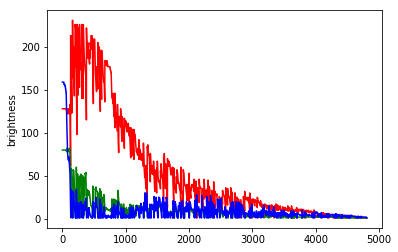

In [177]:
import matplotlib.pyplot as plt
plt.plot([f[0] for f in fml], 'r')
plt.plot([f[1] for f in fml], 'g')
plt.plot([f[2] for f in fml], 'b')
plt.ylabel('brightness')
plt.show()

In [234]:
y_r = np.array([f[0] for f in fml])
y_g = np.array([f[1] for f in fml])
y_b = np.array([f[2] for f in fml])
x = np.array([f for f in range(len(fml))])

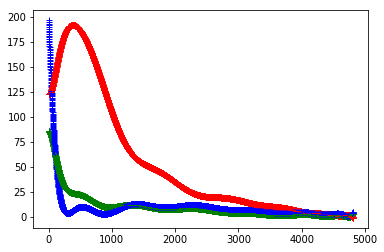

In [228]:
# https://peteris.rocks/blog/extrapolate-lines-with-numpy-polyfit/
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html
z_r = np.polyfit(x, y_r, 15)
z_g = np.polyfit(x, y_g, 15)
z_b = np.polyfit(x, y_b, 15)

f_r = np.poly1d(z_r)
f_g = np.poly1d(z_g)
f_b = np.poly1d(z_b)

for x1 in np.linspace(0, len(y), len(y)):
    #print(x1)
    plt.plot(x1, f_r(x1), 'r+')
    plt.plot(x1, f_g(x1), 'g+')
    plt.plot(x1, f_b(x1), 'b+')

plt.show()

In [233]:
for x1 in np.linspace(0, len(y)-1, len(y)):
    print(int(f_r(x1)), int(f_g(x1)), int(f_b(x1)))

123 85 196
123 85 194
123 85 193
123 85 191
122 85 189
122 85 188
122 85 186
122 85 184
122 85 182
122 85 181
122 85 179
122 85 177
122 85 176
122 85 174
122 85 172
122 85 171
122 84 169
122 84 168
122 84 166
122 84 164
122 84 163
123 84 161
123 84 160
123 84 158
123 83 157
123 83 155
123 83 154
123 83 152
123 83 151
123 83 149
123 82 148
124 82 146
124 82 145
124 82 143
124 82 142
124 81 140
124 81 139
124 81 137
125 81 136
125 81 135
125 80 133
125 80 132
125 80 131
125 80 129
126 79 128
126 79 127
126 79 125
126 79 124
126 79 123
127 78 121
127 78 120
127 78 119
127 77 117
128 77 116
128 77 115
128 77 114
128 76 112
129 76 111
129 76 110
129 76 109
129 75 108
130 75 106
130 75 105
130 74 104
130 74 103
131 74 102
131 74 101
131 73 99
131 73 98
132 73 97
132 72 96
132 72 95
133 72 94
133 72 93
133 71 92
133 71 91
134 71 90
134 70 88
134 70 87
135 70 86
135 69 85
135 69 84
135 69 83
136 69 82
136 68 81
136 68 80
137 68 79
137 67 78
137 67 78
138 67 77
138 66 76
138 66 75
139 66 74
139

126 10 3
126 10 3
126 10 3
126 10 3
125 10 3
125 10 3
125 10 3
125 10 3
125 10 3
124 10 3
124 10 3
124 10 3
124 10 3
124 10 3
123 10 3
123 10 3
123 10 3
123 10 3
123 10 3
122 9 3
122 9 3
122 9 3
122 9 3
122 9 3
121 9 3
121 9 3
121 9 3
121 9 3
121 9 3
120 9 3
120 9 3
120 9 3
120 9 3
120 9 3
120 9 3
119 9 3
119 9 3
119 9 3
119 9 3
119 9 3
118 9 3
118 9 3
118 9 3
118 9 3
118 9 3
117 9 3
117 9 3
117 9 3
117 9 3
117 9 3
116 9 3
116 9 3
116 9 3
116 9 3
116 9 3
115 9 3
115 9 3
115 9 3
115 9 3
115 9 3
115 9 3
114 9 3
114 9 3
114 9 3
114 9 3
114 9 3
113 9 3
113 9 3
113 9 3
113 9 3
113 9 3
112 9 3
112 9 3
112 9 3
112 9 3
112 9 3
112 9 3
111 9 3
111 9 3
111 9 3
111 9 3
111 9 3
110 9 3
110 9 3
110 9 4
110 9 4
110 9 4
109 9 4
109 9 4
109 9 4
109 9 4
109 9 4
109 9 4
108 9 4
108 9 4
108 9 4
108 9 4
108 9 4
107 9 4
107 9 4
107 9 4
107 9 4
107 9 4
106 9 4
106 9 4
106 9 4
106 9 4
106 9 4
106 9 4
105 9 4
105 9 4
105 9 4
105 9 4
105 9 4
104 9 4
104 9 4
104 9 4
104 9 4
104 9 4
104 9 4
103 9 4
103 9 4
103 9

28 8 11
28 8 11
28 8 11
28 8 11
28 8 11
28 8 11
28 8 11
28 8 11
28 8 11
28 8 11
28 8 11
27 8 11
27 8 11
27 8 11
27 8 11
27 8 11
27 8 11
27 8 11
27 8 11
27 8 11
27 8 11
27 8 11
27 8 11
27 8 11
27 8 11
27 8 11
27 8 11
27 8 11
27 8 11
27 8 11
27 8 11
27 8 11
27 8 11
27 8 11
27 8 11
27 8 11
27 8 11
26 8 11
26 8 11
26 8 11
26 8 11
26 8 11
26 8 11
26 8 11
26 8 11
26 8 11
26 8 11
26 8 11
26 8 11
26 8 11
26 8 11
26 8 11
26 8 11
26 8 11
26 8 11
26 8 11
26 8 11
26 8 11
26 8 11
26 8 11
26 8 11
26 8 11
26 8 11
26 8 11
26 8 11
25 8 11
25 8 11
25 8 11
25 8 11
25 8 11
25 8 11
25 8 11
25 8 11
25 8 11
25 8 11
25 8 11
25 8 11
25 8 11
25 8 11
25 8 11
25 8 11
25 8 11
25 8 11
25 8 11
25 8 11
25 8 11
25 8 11
25 8 11
25 8 11
25 8 11
25 8 11
25 8 11
25 8 11
25 8 11
24 8 11
24 8 11
24 8 11
24 8 11
24 8 11
24 8 11
24 8 11
24 8 11
24 8 11
24 8 11
24 8 11
24 8 11
24 8 11
24 8 11
24 8 11
24 8 11
24 8 11
24 8 11
24 8 11
24 8 11
24 8 11
24 8 11
24 8 11
24 8 11
24 8 11
24 8 11
24 8 11
24 8 11
24 8 11
24 8 11
24 8 11


9 1 4
9 1 4
9 1 4
9 1 4
9 1 4
9 1 4
9 1 4
9 1 4
9 1 4
9 1 4
9 1 4
9 1 4
9 1 4
9 1 4
9 1 4
9 1 4
9 1 4
9 1 4
9 1 4
9 1 4
9 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
8 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 4
7 1 